# Heap
- `우선순위 큐`(Priority Queue; 우선순위에 따라서 데이터를 추출하는 자료구조) 구현 목적으로 사용
- 원소들 중 최댓값 혹은 최솟값을 빠르게 찾아내는 자료구조
- `최대 힙(Max Heap)`: 값이 큰 원소부터 추출
- `최소 힙(Min Heap)`: 값이 작은 원소부터 추출

- 삽입, 삭제 O(logN)
- 정렬, N개 데이터를 heap에 넣었다가 빼는 작업 O(NlogN)

## Heap의 특징
- 완전 이진 트리 자료구조를 따른다.
> 복습: 완전 이진 트리: 모든 노드가 왼쪽 자식부터 차근차근 채워진 트리

- __우선순위가 높은 노드가 루트에 위치__ 한다.
1. 최대 힙 (Max Heap)
- 부모 노드의 key 값이 자식 노드의 key 값보다 항상 크다.
- 루트 노드가 가장 크며, 값이 큰 데이터가 우선 순위를 가진다.
2. 최소 힙(Min Heap)
- 부모 노드의 key 값이 자식 노드의 key 값보다 항상 작다.
- 루트 노드가 가장 작으며, 값이 작은 데이터가 우선 순위를 가진다.

## 최소 힙 구성 함수: Heapify
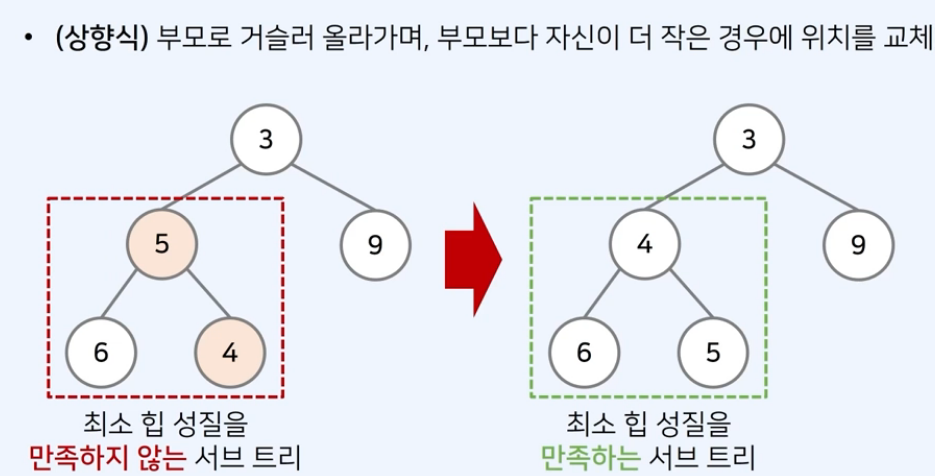

In [1]:
class Heap:
    def __init__(self):
        # 첫 번째 원소는 사용 X
        self.arr = [None]
    
    def push(self, x):
        # 마지막 위치에 원소 삽입
        self.arr.append(x)
        # 첫 원소인 경우 종료
        if len(self.arr) == 2:
            return None
        
        # 값의 크기를 비교하며 부모를 타고 올라감
        i = len(self.arr) - 1
        while True:
            parent = i // 2
            if 1 <= parent and self.arr[parent] > self.arr[i]:
                # 최소 heap을 만족하지 못하면 parent와 i의 값을 바꿔줌
                self.arr[parent], self.arr[i] = self.arr[i], self.arr[parent]
            else:
                break
    
    def pop(self):
        i = len(self.arr) - 1 # 마지막 원소
        
        if i < 1:
            return None
        
        # 루트 원소와 마지막 원소를 교체하여 마지막 원소 추출
        self.arr[1], self.arr[i] = self.arr[i], self.arr[1]
        result = self.arr.pop()
        
        # 루트에서부터 원소 정렬
        self.heapify()

        return result
    
    def heapify(self): # 루트에서부터 자식 방향으로 내려가며 재정렬
        if len(self.arr) <= 2:
            return None
        
        i = 1 # root
        while True:
            child = 2 * i # 왼쪽 자식
            # 왼쪽 자식과 오른쪽 자식 중 더 작은 것을 선택
            if child + 1 < len(self.arr):
                if self.arr[child] > self.arr[child + 1]:
                    child += 1
            
            # 더 이상 자식이 없거나 적절한 위치를 찾은 경우
            if child >= len(self.arr) or self.arr[child] > self.arr[i]:
                break
            
            # 원소를 교체하며 자식 방향으로 내려가기
            self.arr[i], self.arr[child] = self.arr[child], self.arr[i]
            i = child

In [2]:
arr = [9, 1, 5, 4, 3, 8, 7]
heap = Heap()

for x in arr:
    heap.push(x)

while True:
    x = heap.pop()
    if x == None:
        break
    print(x, end=" ")

1 3 4 5 7 8 9 

## 파이썬 `heapq` 라이브러리 사용

- `heapq.heappush(heap, val)`: 원소 삽입
- `heapq.heappop(heap, val)`: 원소 추출
- `heapq.heapify(list)`: 리스트 내부를 수정하여 heap으로 만듦

In [7]:
import heapq

arr = [9, 1, 5, 4, 3, 8, 7]
heap = []

for x in arr:
    heapq.heappush(heap, x)


while heap:
    element = heapq.heappop(heap)
    print(element, end=" ")

1 3 4 5 7 8 9 

In [6]:
import heapq

heap = [9, 1, 5, 4, 3, 8, 7]
heapq.heapify(heap)

while heap:
    element = heapq.heappop(heap)
    print(element, end=" ")

1 3 4 5 7 8 9 

### 최대 힙
- `heapq` 라이브러리는 기본적으로 최소 힙 제공
- 최대 힙을 위해서는 삽입과 추출 시 key에 음수 부호를 취한다.

In [8]:
import heapq

arr = [9, 1, 5, 4, 3, 8, 7]
heap = []

for x in arr:
    heapq.heappush(heap, -x)


while heap:
    element = -heapq.heappop(heap)
    print(element, end=" ")


9 8 7 5 4 3 1 

### 활용 예시

#### 1. Heap Sort
- 단순하게 heap에 원소를 넣었다 꺼내는 것만으로도 정렬 수행 가능

In [9]:
import heapq

def heap_sort(arr):
    heap = []
    for x in arr:
        heapq.heappush(heap, x)
    
    result = []
    while heap:
        x = heapq.heappop(heap)
        result.append(x)
    
    return result

In [10]:
print(heap_sort([9, 1, 5, 4, 3, 8, 7]))

[1, 3, 4, 5, 7, 8, 9]


In [11]:
# Descending도 구현해보자
import heapq

def heap_sort(arr, ascending=True):
    heap = []
    result = []

    if ascending:
        for x in arr:
            heapq.heappush(heap, x)
        
        while heap:
            x = heapq.heappop(heap)
            result.append(x)
    
    else:
        for x in arr:
            heapq.heappush(heap, -x)
        
        while heap:
            x = -heapq.heappop(heap)
            result.append(x)
    
    return result

In [14]:
arr = [9, 1, 5, 4, 3, 8, 7]
print("Ascending: ", heap_sort(arr))
print("Descending: ", heap_sort(arr, ascending=False))

Ascending:  [1, 3, 4, 5, 7, 8, 9]
Descending:  [9, 8, 7, 5, 4, 3, 1]


#### 2. Nth Smallest Number
- heap을 만든 후 pop 함수를 n번 호출

In [13]:
import heapq

def n_smallest(n, arr):
    heap = []
    for x in arr:
        heapq.heappush(heap, x)

    result = None
    for _ in range(n):
        result = heapq.heappop(heap)
    
    return result

In [15]:
arr = [9, 1, 5, 4, 3, 8, 7]
n_smallest(3, arr)

4

#### 3. Nth Largest Number
- 최대 heap을 만든 후 pop 함수를 n번 호출

In [16]:
import heapq

def n_largest(n, arr):
    heap = []
    for x in arr:
        heapq.heappush(heap, -x)

    result = None
    for _ in range(n):
        result = -heapq.heappop(heap)
    
    return result

In [17]:
arr = [9, 1, 5, 4, 3, 8, 7]
n_largest(3, arr)

7